IMPORTS

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import json
from json.decoder import JSONDecodeError
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


FUNCTIONS

In [3]:
def merge_columns_to_one(df):
    df['information'] = df.drop("title",axis=1).apply(lambda row: ' '.join(map(str, row)), axis=1) 

def keywords_to_string(df):
    for i in range(df.shape[0]):
        try:
            keyword_str=df["keywords"][i]
            dict_list=json.loads(keyword_str)
            keywords_string=" ".join([dictionary["name"] for dictionary in dict_list]  )
            df.at[i,"keywords"]=keywords_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")
    
def countries_to_string(df):
    for i in range(df.shape[0]):
        try:
            country_str=df["production_countries"][i]
            dict_list=json.loads(country_str)
            country_name=" ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i,"production_countries"]=country_name
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i} : {e}")


def genres_to_string(df):
    for i in range(df.shape[0]):
        try:
            genres_str = df["genres"][i]
            dict_list = json.loads(genres_str)
            genre_string = " ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i, "genres"] = genre_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")

def company_to_string(df):
    for i in range(df.shape[0]):
        try:
            genres_str = df["production_companies"][i]
            dict_list = json.loads(genres_str)
            genre_string = " ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i, "production_companies"] = genre_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")
def spoken_languages(df):
    for i in range(df.shape[0]):
        try:
            genres_str = df["spoken_languages"][i]
            dict_list = json.loads(genres_str)
            genre_string = " ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i, "spoken_languages"] = genre_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")

def preprocess(df):
    countries_to_string(df)
    company_to_string(df)
    spoken_languages(df)
    genres_to_string(df)
    keywords_to_string(df)
    merge_columns_to_one(df)
    df.drop(df.columns.difference(["title","information"]),axis=1,inplace=True)

def recommend_movie(input):
    try:
        index=df.index[df["title"]==input].tolist()[0]
        tf_idf_vector_input=vector_map[index][1]
        cosine_sim_matrix=[(index,i,cosine_similarity(tf_idf_vector_input.reshape(1,-1),vector_map[i][1].reshape(1,-1))) for i in range(len(tf_idf_vector))]
        global scores
        scores=[]
        for __,_,cosine_sim in cosine_sim_matrix:
            scores.append(cosine_sim)
        top_5_movie_index=sorted(cosine_sim_matrix,key=lambda x: x[2],reverse=True)[1:6]
        for _,i,__ in top_5_movie_index:
            print(df["title"][i])
    except IndexError:
        print(f"No movie found with the title: {input} in the database")    

Data Preprocessing

In [4]:
data=pd.read_csv("tmdb_5000_movies.csv")
features_to_drop=["budget","homepage","popularity","release_date","revenue","runtime","vote_average","vote_count","id"]
df=data.drop(columns=features_to_drop)
preprocess(df)
TF_object=TfidfVectorizer()   # -- reducing the features by using the max_features 
                              # -- function also reduces the accuracy as we are reducing the
                              # -- vocabulary size

vectorizer=TF_object.fit_transform(df["information"])
tf_idf_vector=(vectorizer.toarray())
vector_map=[(i,tf_idf_vector[i]) for i in range(len(tf_idf_vector))]

User Input 

In [9]:
input="Moonraker"
recommend_movie(input)

Gravity
2001: A Space Odyssey
Mission to Mars
Avatar
You Only Live Twice


SCORES PLOT

In [276]:
score_flat=np.array(scores).flatten()

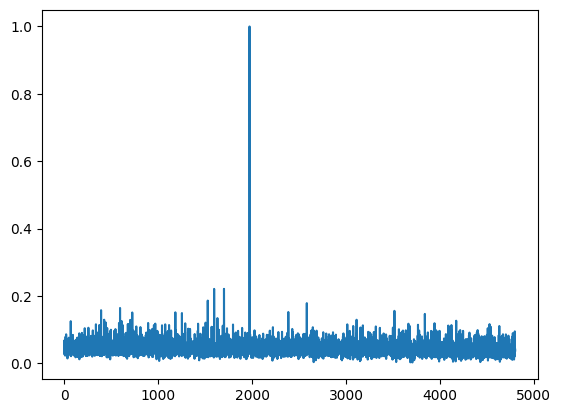

In [292]:
plt.plot(score_flat)

In [280]:
#this is the method to get the index of the values sorted on the basees of the values in descending order

df["title"][(-score_flat).argsort()[0]]

'Double Take'

In [281]:
(score_flat).argsort()

array([3707, 3686, 2656, ..., 1596, 1701, 1973], dtype=int64)

plotting the scores after sorting them

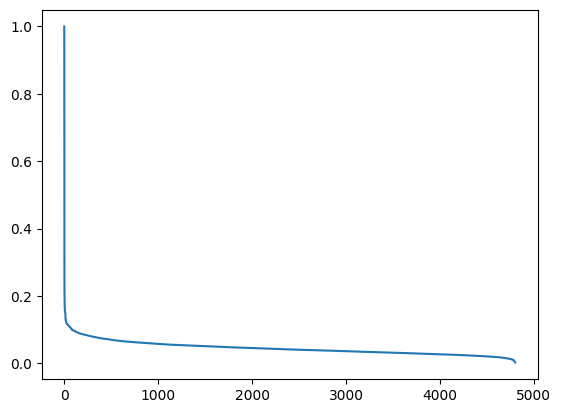

In [293]:
plt.plot(score_flat[(-score_flat).argsort()])